# **Computer Assignment2 Bonus Question4**
## **Course** : Deep Learning Course
## **Department of Electrical Engineering At Sharif University of Technology**
### **Author**: M.Sina Hasan-Nia 
### **ID Number**: 96108515

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, losses,models
from tensorflow import keras
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import load_model
from google.colab import drive
from scipy.io import loadmat
drive.mount('/content/drive')
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

The ordering of the joints is as follows:
Right ankle,
Right knee,
Right hip,
Left hip,
Left knee,
Left ankle,
Right wrist,
Right elbow,
Right shoulder,
Left shoulder,
Left elbow,
Left wrist,
Neck,
Head top

In [ ]:
joints = ['Right ankle(0)', 'Right knee(1)', 'Right hip(2)', 'Left hip(3)', 'Left knee(4)', 'Left ankle(5)', 'right wrist(6)', 'right elbow(7)', 'right shoulder(8)', 'right shoulder(9)', 'left elbow10', 'left wrist(11)', 'neck(12)', 'Head top(13)']

joint_mat = loadmat("/content/drive/MyDrive/lsp/joints.mat")['joints']
joint_mat = joint_mat[0:2]
img_dir=[]
for root, dirs, files in os.walk("/content/drive/MyDrive/lsp/images"):
   for name in files:
      img_dir.append((os.path.join(root, name)))
img_dir.sort()
imgsize=(227,227)
train_data = np.zeros((2000, 227, 227, 3), dtype=np.int32)
Ny = np.zeros((2, 14, 2000))
for i in range(len(img_dir)):
  img =cv2.cvtColor((cv2.imread(img_dir[i])) , cv2.COLOR_BGR2RGB)
  bh = img.shape[0]
  bw = img.shape[1]
  Ny[:, :, i] = np.matmul(np.array([[1/bw, 0], [0, 1/bh]]), joint_mat[:, :, i]-np.array([[bw/2], [bh/2]]))
  train_data[i,:,:,:] = cv2.resize(img,imgsize)/255
y = Ny.transpose((2, 1, 0)).reshape((2000, -1))
train2valid_spliter_ratio = 0.15
train2test_spliter_ratio = 0.15
num_dastaset = train_data.shape[0]
num_valid = int(train2valid_spliter_ratio*num_dastaset)
num_test = int(train2test_spliter_ratio*num_dastaset)
num_train = num_dastaset-num_valid-num_test
x_train = train_data[0:num_train] 
y_train = y[0:num_train]
x_valid = train_data[num_train:num_train+num_valid]
y_valid = y[num_train:num_train+num_valid] 
x_test = train_data[num_train+num_valid:]
y_test= y[num_train+num_valid:]
print("num_dastaset\t{} ". format(num_dastaset))
print("num_valid\t{} ".format(num_valid))
print("num_train\t{} ".format(num_train))
print("x_train\t{} ".format(x_train.shape))
print("y_train\t{} ".format(y_train.shape))
print("x_valid\t{} ".format(x_valid.shape))
print("y_valid\t{} ".format(y_valid.shape))
print("x_test\t{} ".format(x_test.shape))
print("y_test\t{} ".format(y_test.shape))


num_dastaset	2000 
num_valid	300 
num_train	1400 
x_train	(1400, 227, 227, 3) 
y_train	(1400, 28) 
x_valid	(300, 227, 227, 3) 
y_valid	(300, 28) 
x_test	(300, 227, 227, 3) 
y_test	(300, 28) 


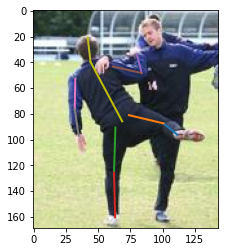

In [ ]:

img =cv2.cvtColor((cv2.imread(img_dir[1028])) , cv2.COLOR_BGR2RGB)
plt.imshow(img)
indexes = [0, 1, 3, 4, 6, 7, 9, 10, 12]
sina = joint_mat[:,:,1028]
x = sina[0, :]
y = sina[1, :]
for index in indexes:
  plt.plot(x[index:index+2], y[index:index+2], linewidth=2)
x_mean = (x[2] + x[3]) / 2
y_mean = (y[2] + y[3]) / 2
plt.plot([x_mean, x[12]], [y_mean, y[12]], 'y', linewidth=2)



In [ ]:
model = keras.Sequential()
model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(28))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mse')

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=200, validation_data=(x_valid, y_valid))

Epoch 1/200
11/11 [==============================] - 28s 1s/step - loss: 2.5372 - val_loss: 21.1616
Epoch 2/200
11/11 [==============================] - 4s 329ms/step - loss: 1.5895 - val_loss: 10.7878
Epoch 3/200
11/11 [==============================] - 4s 332ms/step - loss: 1.3251 - val_loss: 4.4854
Epoch 4/200
11/11 [==============================] - 4s 330ms/step - loss: 1.1797 - val_loss: 3.1405
Epoch 5/200
11/11 [==============================] - 4s 331ms/step - loss: 1.0384 - val_loss: 1.6129
Epoch 6/200
11/11 [==============================] - 4s 332ms/step - loss: 0.9539 - val_loss: 1.3015
Epoch 7/200
11/11 [==============================] - 4s 330ms/step - loss: 0.8789 - val_loss: 0.8460
Epoch 8/200
11/11 [==============================] - 4s 331ms/step - loss: 0.7987 - val_loss: 0.4830
Epoch 9/200
11/11 [==============================] - 4s 327ms/step - loss: 0.7190 - val_loss: 0.2953
Epoch 10/200
11/11 [==============================] - 4s 332ms/step - loss: 0.6715 - val_lo

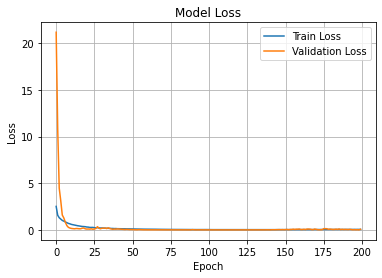

In [ ]:
plt.figure()
plt.plot(history.history['loss'] , label="Train Loss")
plt.plot(history.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 36ms/step - loss: 0.0547


0.0546870231628418

In [ ]:
allpredictions = model.predict(train_data)

In [ ]:
model.save_weights('/content/drive/MyDrive/checkpoints/my_checkpoint')
model.save('/content/drive/MyDrive/model/mymodel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model/mymodel/assets


In [ ]:
"""
1-Right ankle(0), Right knee(1)
2-Right knee(1), Right hip(2) 
3-Left hip(3), Left knee(4)
4-Left knee(4), Left ankle(5),
5- Right wrist(6), Right elbow(7),
6-Right elbow(7), Right shoulder(8)
7- Left shoulder(9), Left elbow(10), 
8- Left elbow(10), Left wrist(11),
9- Left hip(3),Right hip(2),Neck(12)
10- Neck(12), Head top(13)
in all predictions x & y for each indx i  : x=2i , y = 2i+1
attention! since our input was normalized the out is normalized too.
"""
reshaped_all_prediction=np.zeros((2000, 2, 14))
for i in range(2000):
  allprediction_block = allpredictions[i,:].reshape((28,))
  x = allprediction_block[np.arange(0, 27, 2)]
  y = allprediction_block[np.arange(1, 28, 2)]
  x_y = np.concatenate((x.reshape((1, 14)), y.reshape((1, 14))))
  img =cv2.cvtColor((cv2.imread(img_dir[i])) , cv2.COLOR_BGR2RGB)
  reshaped_all_prediction[i,:,:] = np.matmul(np.array([[img.shape[1], 0], [0, img.shape[0]]]), x_y) + np.array([[img.shape[1]/2], [img.shape[0]/2]]) 


In [ ]:
def dist1(x1,x2,y1,y2):
  return ((x1 - x2)**2 + (y1 - y2)**2)**0.5
y = Ny.transpose((2, 1, 0)).reshape((2000, -1))

In [ ]:
# PCP
# as I wrote in the above cell that we have 10 limbs. each limbs contains 2 joints so we will have:
left_joint_idx = [ 0,1,3,4,6,7,9,10,12] 
right_joint_idx = [1,2,4,5,7,8,10,11,13]
PCP_calc =  np.zeros((2000, 10))
for i in range(2000):
  for j in range(10):
    # left joint of limb x & y
    x_actual_left = joint_mat[0, left_joint_idx[j], i]
    y_actual_left = joint_mat[1, left_joint_idx[j], i]  
    x_predict_left = reshaped_all_prediction[i, 0, left_joint_idx[j]]
    y_predict_left = reshaped_all_prediction[i, 1, left_joint_idx[j]]
    # right joint of limb x & y
    x_actual_right = joint_mat[0, right_joint_idx[j], i]
    y_actual_right = joint_mat[1, right_joint_idx[j], i]  
    x_predict_rigth = reshaped_all_prediction[i, 0, right_joint_idx[j]]
    y_predict_right = reshaped_all_prediction[i, 1, right_joint_idx[j]]
    # PCP
    limb_dist=dist1(x_actual_left,x_actual_right,y_actual_left,y_actual_right)
    left_dist = dist1(x_actual_left,x_predict_left,y_actual_left,y_predict_left)
    right_dist = dist1(x_actual_right,x_predict_rigth,y_actual_right,y_predict_right)
    PCP_calc[i,j] = (left_dist+right_dist) < 0.5*limb_dist
    if j==9:
      x_actual_left = (joint_mat[0, left_joint_idx[2], i]+joint_mat[0, right_joint_idx[1], i])*0.5
      y_actual_left = (joint_mat[1, left_joint_idx[2], i] +joint_mat[1, right_joint_idx[1], i] ) *0.5
      x_predict_left =0.5* (reshaped_all_prediction[i, 0, left_joint_idx[2]]+reshaped_all_prediction[i, 0, right_joint_idx[1]])
      y_predict_left =0.5*( reshaped_all_prediction[i, 1, left_joint_idx[2]]+ reshaped_all_prediction[i, 1, right_joint_idx[1]])
    # right joint of limb x & y
      x_actual_right = (joint_mat[0, right_joint_idx[j], i])
      y_actual_right = joint_mat[1, right_joint_idx[j], i]  
      x_predict_rigth = reshaped_all_prediction[i, 0, right_joint_idx[j]]
      y_predict_right = reshaped_all_prediction[i, 1, right_joint_idx[j]]
    # PCP
    limb_dist=dist1(x_actual_left,x_actual_right,y_actual_left,y_actual_right)
    left_dist = dist1(x_actual_left,x_predict_left,y_actual_left,y_predict_left)
    right_dist = dist1(x_actual_right,x_predict_rigth,y_actual_right,y_predict_right)



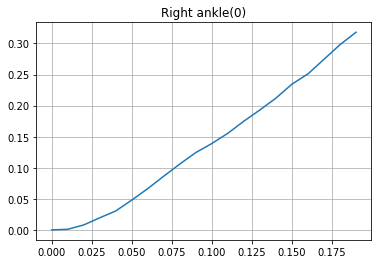

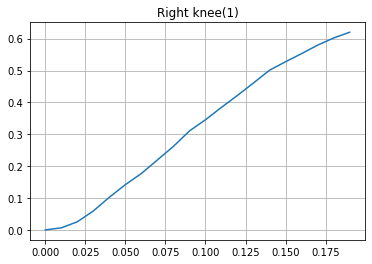

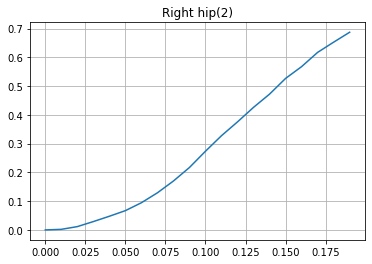

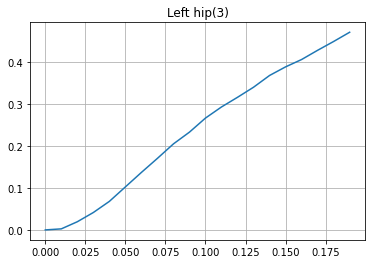

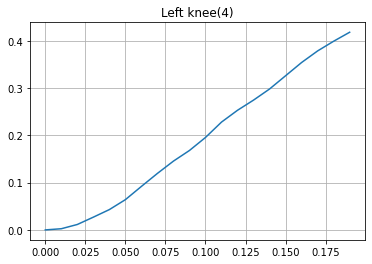

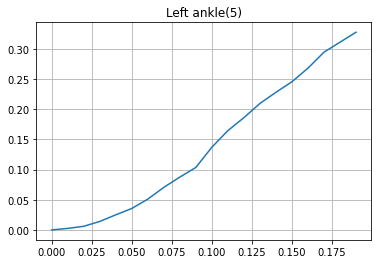

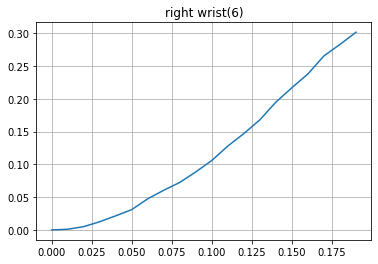

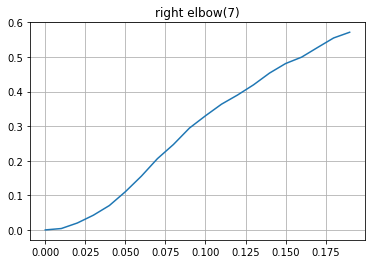

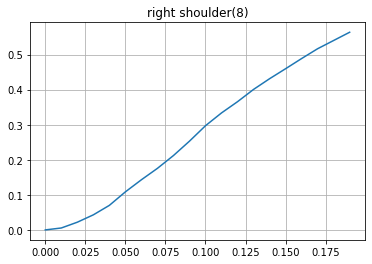

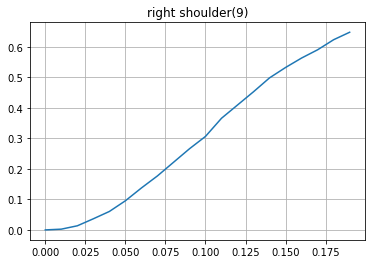

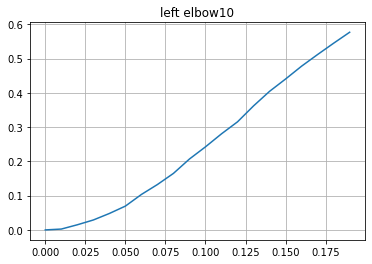

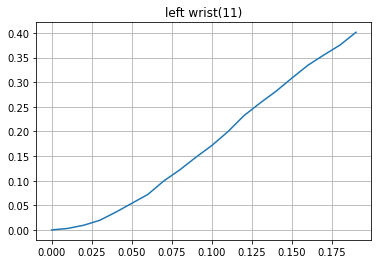

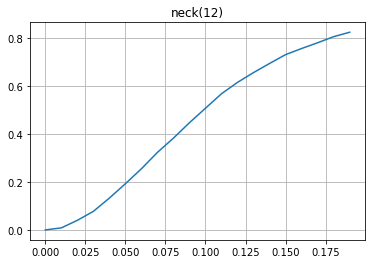

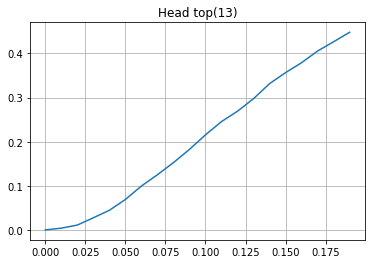

In [ ]:
# PDJ criterion is measurement which is calculated in the normalized state
s = (allpredictions - y) ** 2
lenj = np.zeros((2000, 14))
for i in range(14):
  for j in range(2000):
    lenj[j, i] = np.sqrt(s[j, 2*i]+s[j, 2*i+1])

thrs = np.arange(0,0.2,0.01)
PDJ = np.zeros(thrs.shape)
for i in range(14):
  for j, thr in enumerate(thrs):
    PDJ[j] = (lenj[:, i] < thr).sum() / 2000
  plt.figure()
  plt.plot(thrs, PDJ)
  plt.title(joints[i])
  plt.grid()

In [ ]:
allpredictions.shape
ff= y

In [ ]:
for i in range(0,20):
  img =cv2.cvtColor((cv2.imread(img_dir[i])) , cv2.COLOR_BGR2RGB)
  #plt.imshow(img)
  allprediction_block = allpredictions[i,:]
  x = allprediction_block[np.arange(0, 27, 2)]
  y = allprediction_block[np.arange(1, 28, 2)]
  x_y = np.concatenate((x.reshape((1, 14)), y.reshape((1, 14))))
  y=np.matmul(np.array([[img.shape[1], 0], [0, img.shape[0]]]), x_y) + np.array([[img.shape[1]/2], [img.shape[0]/2]]) 
  x1 = y[0,:]
  y1 = y[1,:]
  plt.figure()
  #plt.subplot(211)
  plt.imshow(img)
  for j in [0, 1, 3, 4, 6, 7, 9, 10, 12]:
    plt.plot(x1[j:j+2],y1[j:j+2],linewidth=2) 
